In [47]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt


In [48]:
def  readData(filename):
    df = pd.read_csv(filename)
    return df.values

x = readData('C:/Users/hamuj/Desktop/ml/linearX.csv')
y = readData('C:/Users/hamuj/Desktop/ml/linearY.csv') 
x = x.reshape((99,))
y = y.reshape((99,))

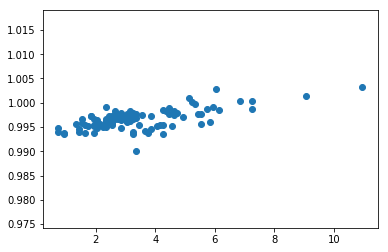

In [49]:
x = x - x.mean()/(x.std())
plt.scatter(x,y)
plt.show()


In [50]:
def hypo(X,th):
    return th[0] + ( X * th[1] )

def err(X,Y,th):
    total_err=0
    m=X.shape[0]
    
    for ix in range(m):
        total_err +=(Y[ix]-hypo(X[ix],th))**2
        
    return 0.5*total_err

def gradient(X,Y,th):
    grad=np.array([0.0,0.0])
    m=X.shape[0]
    for ix in range(m):
        grad[0] +=(hypo(X[ix],th)-Y[ix])
        grad[1] +=(hypo(X[ix],th)-Y[ix])*X[ix]
        
    return grad

def grad_dec(X,Y,theta,L_R,max_itr):
    e=[]
    
    grad=np.array([0.0,0.0])
    for ix in range(max_itr):
        grad=gradient(X,Y,theta)
        ce=err(X,Y,theta)
        #print(ce)
        theta[0] =theta[0]-L_R*grad[0]
        theta[1] =theta[1]-L_R*grad[1]
        e.append(ce)
    return theta,e
        
    
    
        
    

In [51]:
theta_01=np.array([0.0,0.0])

In [52]:
theta_01,e_01= grad_dec(x,y,theta_01,L_R=0.0001,max_itr=500)

In [53]:
print(theta_01[0],theta_01[1])
print(e_01)

0.636236449407 0.0856216133885
[49.167549095000041, 37.888007692815641, 29.759081094909686, 23.8980815376515, 19.66962856739864, 16.616359600763488, 14.409053685794134, 12.810729361499398, 11.650801416232158, 10.806478288277773, 10.189371458359314, 9.7358565618066297, 9.4001350805922748, 9.1492399790175867, 8.9594406377348648, 8.8136550370453595, 8.6995869829401204, 8.6083852366967353, 8.5336783234612685, 8.4708797637814044, 8.4166879622150432, 8.3687262148778991, 8.3252835780414998, 8.2851283389897965, 8.2473737477632145, 8.2113813675714518, 8.1766915040473478, 8.1429731265147272, 8.1099878200864026, 8.0775638374977952, 8.0455774209782138, 8.0139393572735091, 7.9825852996196316, 7.9514688012597281, 7.9205563007969699, 7.8898235125265179, 7.8592528281060039, 7.8288314462123116, 7.7985500262207283, 7.7684017190882759, 7.7383814697579032, 7.7084855150100102, 7.6787110220018056, 7.6490558280772039, 7.619518253473772, 7.5900969665027542, 7.5607908865004658, 7.5315991139685821, 7.5025208802

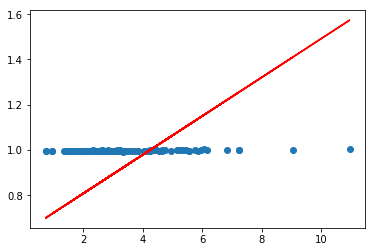

In [54]:
plt.scatter(x,y)
plt.plot(x,hypo(x,theta_01),color='r')
plt.show()

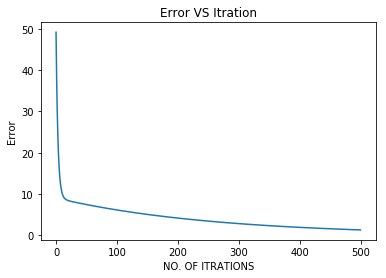

In [55]:
plt.figure()
plt.plot(range(500),e_01)
plt.title("Error VS Itration")
plt.xlabel("NO. OF ITRATIONS")
plt.ylabel("Error")
plt.show()